# Understanding the data
## Its clear that its a numerical data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Chennai_housing.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

P03210    1
P01175    1
P07437    1
P06628    1
P02767    1
         ..
P01279    1
P00654    1
P03895    1
P02662    1
P09794    1
Name: PRT_ID, Length: 7109, dtype: int64
********************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
********************
1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64
********************
06-10-2009    12
06-01-2009    10
12-04-2011    10
26-02-2012    10
17-11-2010    10
              ..
21-12-2014     1
29-06-2004     1
27-08-2004     1
03-05-2012     1
13-07-2005     1
Name: DATE_SALE, Length: 2798, dtype: int64
********************


# Cleaning the data

In [6]:
data.drop("PRT_ID",axis = 1, inplace = True)
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
data = data.dropna(how='any') # dropping the rows having null values
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [8]:
data['bhk'] = data['N_BEDROOM']

In [9]:
data = data.drop_duplicates()
data.shape
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,1.0
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2.0
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,1.0
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3.0
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,1.0


In [10]:
data.drop('N_BEDROOM', axis = 1, inplace = True)
data.drop('N_ROOM', axis = 1, inplace = True)

In [11]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BATHROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'bhk'],
      dtype='object')

In [12]:
data['price_per_sqft'] = data['SALES_PRICE']/data['INT_SQFT']

In [13]:
data['price_per_sqft']

0        7569.721116
1       10935.433031
2       14476.567657
3        5191.530997
4        6040.986949
            ...     
7104     8951.505017
7105     5702.941487
7106     5174.355638
7107    10809.402795
7108     5261.856540
Name: price_per_sqft, Length: 7056, dtype: float64

In [14]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,price_per_sqft
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000,7056.000000
mean,1381.316752,99.569161,1.213152,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07,1.636621,8245.223564
std,457.860850,57.403870,0.409563,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06,0.803633,2459.162150
min,500.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,1.000000,2983.242134
25%,991.000000,50.000000,1.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06,1.000000,6380.135592
50%,1369.500000,99.000000,1.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07,1.000000,7923.932387
75%,1744.000000,148.000000,1.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07,2.000000,9823.141898
max,2500.000000,200.000000,2.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.000000,18543.860759


In [15]:
data['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [16]:
data['AREA'] = data['AREA'].apply(lambda x:x.strip())
location_count = data['AREA'].value_counts()

In [17]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Chrompt      9
Chrmpet      6
TNagar       5
Chormpet     5
Karapakam    3
Ana Nagar    3
Velchery     2
Ann Nagar    2
Adyr         1
KKNagar      1
Name: AREA, dtype: int64

### Outlier detection and removal

In [18]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,price_per_sqft
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000,7056.000000
mean,1381.316752,99.569161,1.213152,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07,1.636621,8245.223564
std,457.860850,57.403870,0.409563,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06,0.803633,2459.162150
min,500.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,1.000000,2983.242134
25%,991.000000,50.000000,1.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06,1.000000,6380.135592
50%,1369.500000,99.000000,1.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07,1.000000,7923.932387
75%,1744.000000,148.000000,1.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07,2.000000,9823.141898
max,2500.000000,200.000000,2.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.000000,18543.860759


In [19]:
data.drop('QS_ROOMS',axis = 1, inplace = True)
data.drop('QS_BATHROOM',axis = 1, inplace = True)
data.drop('QS_BEDROOM',axis = 1, inplace = True)

In [20]:
(data['INT_SQFT']/data['bhk']).describe()

count    7056.000000
mean      925.167777
std       305.874210
min       500.000000
25%       700.875000
50%       847.000000
75%      1037.000000
max      1799.000000
dtype: float64

In [21]:
data = data[((data['INT_SQFT']/data['bhk']) >= 500)]

In [22]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,price_per_sqft
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000,7056.000000
mean,1381.316752,99.569161,1.213152,3.503389,376791.852608,140994.273384,1.088801e+07,1.636621,8245.223564
std,457.860850,57.403870,0.409563,0.527313,143109.581793,78774.465963,3.769081e+06,0.803633,2459.162150
min,500.000000,0.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06,1.000000,2983.242134
25%,991.000000,50.000000,1.000000,3.130000,272117.500000,84212.750000,8.266790e+06,1.000000,6380.135592
50%,1369.500000,99.000000,1.000000,3.500000,349444.500000,127640.500000,1.031922e+07,1.000000,7923.932387
75%,1744.000000,148.000000,1.000000,3.890000,451030.500000,184449.000000,1.298148e+07,2.000000,9823.141898
max,2500.000000,200.000000,2.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.000000,18543.860759


In [23]:
def outlier_removal(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('AREA'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[((subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st)))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
data = outlier_removal(data)
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,price_per_sqft
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4.531000e+03,4531.000000,4531.000000
mean,1367.843964,99.375855,1.212536,3.507967,358550.720591,134518.636283,1.034687e+07,1.608254,7884.692401
std,447.115385,57.344728,0.409147,0.521038,119368.570713,71369.898907,2.964833e+06,0.788109,1851.684461
min,500.000000,0.000000,1.000000,2.060000,95798.000000,5126.000000,3.000375e+06,1.000000,4818.511221
25%,983.000000,50.000000,1.000000,3.140000,273256.000000,82350.000000,8.343445e+06,1.000000,6345.099375
50%,1332.000000,99.000000,1.000000,3.520000,343391.000000,125125.000000,1.007040e+07,1.000000,7701.876404
75%,1721.000000,148.000000,1.000000,3.890000,420835.500000,176775.000000,1.237032e+07,2.000000,8995.040992
max,2498.000000,200.000000,2.000000,4.970000,983922.000000,491961.000000,2.133068e+07,4.000000,12179.581590


In [24]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BATHROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,price_per_sqft
0,Adyar,1056,01-01-2007,83,1.0,Partial,Yes,07-01-1981,Others,NoSewr,Paved,RH,3.19,319141,37546,9386490,1.0,8888.721591
1,Adyar,1130,10-11-2011,29,1.0,Family,Yes,17-11-1981,Commercial,ELO,Paved,RH,2.29,468417,53533,13383350,1.0,11843.672566
2,Adyar,730,19-08-2011,185,1.0,AdjLand,Yes,28-08-1972,House,ELO,Gravel,RL,4.18,265449,53090,8848285,1.0,12120.938356
3,Adyar,868,15-08-2011,15,1.0,Normal Sale,No,17-08-2001,Others,NoSeWa,Gravel,RL,2.11,325514,72336,9042050,1.0,10417.108295
4,Adyar,718,23-10-2007,75,1.0,Partial,Yes,30-10-1977,Others,ELO,No Access,C,3.08,211662,55701,5570050,1.0,7757.729805


In [25]:
data.drop('price_per_sqft',axis = 1, inplace = True)

In [26]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BATHROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'bhk'],
      dtype='object')

### work for Encoding 

In [27]:
data['AREA'] = data['AREA'].apply(lambda x: 'other' if x in location_count_less_10 else x)
data['AREA'].value_counts()

Chrompet      1092
Karapakkam     938
KK Nagar       622
Velachery      592
Adyar          501
Anna Nagar     476
T Nagar        288
other           22
Name: AREA, dtype: int64

In [28]:
for x in range(len(data['SALE_COND'])):
    if data['SALE_COND'][x] == 'Adj Land':
        data['SALE_COND'][x] = 'AdjLand'
    elif data['SALE_COND'][x] == "Ab Normal":
        data['SALE_COND'][x] = 'AbNormal'
    elif (data['SALE_COND'][x] == 'Partial1'):
        data['SALE_COND'][x] = 'Partial'
    elif (data['SALE_COND'][x] == 'PartiaLl'):
        data['SALE_COND'][x] = 'Partial'
data['SALE_COND'].value_counts()

c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

AdjLand        944
AbNormal       916
Family         896
Partial        891
Normal Sale    884
Name: SALE_COND, dtype: int64

In [29]:
data['BUILDTYPE'].value_counts()

Others        1926
House         1634
Commercial     950
Other           19
Comercial        2
Name: BUILDTYPE, dtype: int64

In [30]:
for x in range(len(data['BUILDTYPE'])):
    if data['BUILDTYPE'][x] == 'Comercial':
        data['BUILDTYPE'][x] = 'Commercial'
data['BUILDTYPE'].value_counts()

c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Others        1926
House         1634
Commercial     952
Other           19
Name: BUILDTYPE, dtype: int64

In [31]:
data['PARK_FACIL'].value_counts()

Yes    2360
No     2171
Name: PARK_FACIL, dtype: int64

In [32]:
data['UTILITY_AVAIL'].value_counts()

NoSeWa     1223
AllPub     1180
NoSewr     1152
ELO         975
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [33]:
for x in range(len(data['UTILITY_AVAIL'])):
    if data['UTILITY_AVAIL'][x] == 'All Pub':
        data['UTILITY_AVAIL'][x] = 'AllPub'

c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
data['UTILITY_AVAIL'].value_counts()

NoSeWa     1223
AllPub     1181
NoSewr     1152
ELO         975
Name: UTILITY_AVAIL, dtype: int64

In [35]:
data.drop('MZZONE',axis = 1, inplace = True)

In [36]:
data['STREET'].value_counts()

Gravel       1662
Paved        1647
No Access    1212
Pavd            5
NoAccess        5
Name: STREET, dtype: int64

In [37]:
for x in range(len(data['STREET'])):
    if data['STREET'][x] == 'Pavd':
        data['STREET'][x] = 'Paved'
    elif data['STREET'][x] == 'NoAccess':
        data['STREET'][x] = 'No Access'
data['STREET'].value_counts()

c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Gravel       1662
Paved        1652
No Access    1217
Name: STREET, dtype: int64

In [38]:
for i in range(len(data['DATE_SALE'])):
    data['DATE_SALE'][i] = int(data['DATE_SALE'][i][6:])
for i in range(len(data['DATE_BUILD'])):
    data['DATE_BUILD'][i] = int(data['DATE_BUILD'][i][6:])
data.head()

c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\gowthsm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BATHROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk
0,Adyar,1056,2007,83,1.0,Partial,Yes,1981,Others,NoSewr,Paved,3.19,319141,37546,9386490,1.0
1,Adyar,1130,2011,29,1.0,Family,Yes,1981,Commercial,ELO,Paved,2.29,468417,53533,13383350,1.0
2,Adyar,730,2011,185,1.0,AdjLand,Yes,1972,House,ELO,Gravel,4.18,265449,53090,8848285,1.0
3,Adyar,868,2011,15,1.0,Normal Sale,No,2001,Others,NoSeWa,Gravel,2.11,325514,72336,9042050,1.0
4,Adyar,718,2007,75,1.0,Partial,Yes,1977,Others,ELO,No Access,3.08,211662,55701,5570050,1.0


# Exploratory data analysis

In [39]:
corr_matrix = data.corr()
corr_matrix

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk
INT_SQFT,1.000000,0.006539,0.515475,0.020383,0.751105,0.615032,0.729814,0.787013
DIST_MAINROAD,0.006539,1.000000,0.009221,-0.023101,0.008422,0.005758,0.009408,0.008216
N_BATHROOM,0.515475,0.009221,1.000000,0.029934,0.407514,0.345720,0.248738,0.751862
QS_OVERALL,0.020383,-0.023101,0.029934,1.000000,0.026368,0.010761,0.019511,0.027364
REG_FEE,0.751105,0.008422,0.407514,0.026368,1.000000,0.616601,0.830218,0.587593
COMMIS,0.615032,0.005758,0.345720,0.010761,0.616601,1.000000,0.565991,0.505130
SALES_PRICE,0.729814,0.009408,0.248738,0.019511,0.830218,0.565991,1.000000,0.471665
bhk,0.787013,0.008216,0.751862,0.027364,0.587593,0.505130,0.471665,1.000000


<AxesSubplot:>

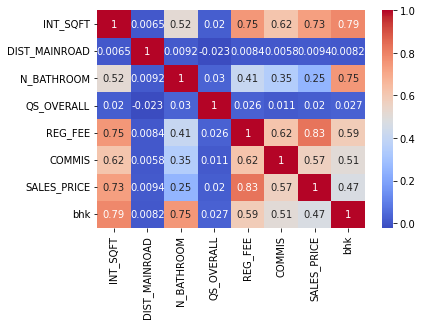

In [40]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [41]:
summary_table = data.describe()
summary_table

,INT_SQFT,DIST_MAINROAD,N_BATHROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4.531000e+03,4531.000000
mean,1367.843964,99.375855,1.212536,3.507967,358550.720591,134518.636283,1.034687e+07,1.608254
std,447.115385,57.344728,0.409147,0.521038,119368.570713,71369.898907,2.964833e+06,0.788109
min,500.000000,0.000000,1.000000,2.060000,95798.000000,5126.000000,3.000375e+06,1.000000
25%,983.000000,50.000000,1.000000,3.140000,273256.000000,82350.000000,8.343445e+06,1.000000
50%,1332.000000,99.000000,1.000000,3.520000,343391.000000,125125.000000,1.007040e+07,1.000000
75%,1721.000000,148.000000,1.000000,3.890000,420835.500000,176775.000000,1.237032e+07,2.000000
max,2498.000000,200.000000,2.000000,4.970000,983922.000000,491961.000000,2.133068e+07,4.000000


In [42]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BATHROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'bhk'],
      dtype='object')

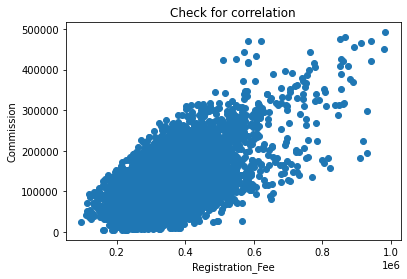

0.6166008322832832


In [43]:
import matplotlib.pyplot as plt

x = data['REG_FEE']
y = data['COMMIS']
plt.scatter(x, y)

# Add labels and title to the plot
plt.xlabel('Registration_Fee')
plt.ylabel('Commission')
plt.title('Check for correlation')

# Display the plot
plt.show()
corr = data['REG_FEE'].corr(data['COMMIS'])
print(corr)

In [44]:
data['REG+COM'] = data['REG_FEE']+data['COMMIS']

In [45]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BATHROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,bhk,REG+COM
0,Adyar,1056,2007,83,1.0,Partial,Yes,1981,Others,NoSewr,Paved,3.19,319141,37546,9386490,1.0,356687
1,Adyar,1130,2011,29,1.0,Family,Yes,1981,Commercial,ELO,Paved,2.29,468417,53533,13383350,1.0,521950
2,Adyar,730,2011,185,1.0,AdjLand,Yes,1972,House,ELO,Gravel,4.18,265449,53090,8848285,1.0,318539
3,Adyar,868,2011,15,1.0,Normal Sale,No,2001,Others,NoSeWa,Gravel,2.11,325514,72336,9042050,1.0,397850
4,Adyar,718,2007,75,1.0,Partial,Yes,1977,Others,ELO,No Access,3.08,211662,55701,5570050,1.0,267363


In [46]:
data.drop('REG_FEE',axis = 1, inplace = True)
data.drop('COMMIS',axis = 1, inplace = True)
data.drop('UTILITY_AVAIL',axis = 1, inplace = True)
data.drop('SALE_COND',axis = 1,inplace = True)

In [47]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BATHROOM',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'STREET', 'QS_OVERALL',
       'SALES_PRICE', 'bhk', 'REG+COM'],
      dtype='object')

# Deploying model (Linear Regression)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [49]:
lr = LinearRegression()

In [50]:
scaler = StandardScaler()

In [51]:
x = data.drop(columns = ['SALES_PRICE'])
y = data['SALES_PRICE']

In [52]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# label encode the Location column
x['AREA'] = le.fit_transform(x['AREA'])
x['BUILDTYPE'] = le.fit_transform(x['BUILDTYPE'])
x['STREET'] = le.fit_transform(x['STREET'])
x['PARK_FACIL'] = le.fit_transform(x['PARK_FACIL'])

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [60]:
print(x_train.shape)
print(x_test.shape)

(3624, 12)
(907, 12)


In [62]:
fitting = lr.fit(x_train,y_train)

In [63]:
y_pred_lr = fitting.predict(x_test)

In [67]:
r2_score(y_test,y_pred_lr)

0.7780288683650972

## Applying Lasso

In [68]:
lasso = Lasso()

In [69]:
fitting = lasso.fit(x_train,y_train)

In [70]:
y_pred_lasso = fitting.predict(x_test)

In [71]:
print(r2_score(y_test,y_pred_lasso))

0.7780288800147297


# Applying Ridge

In [72]:
ridge = Ridge()
fitting = ridge.fit(x_train,y_train)

In [78]:
y_pred_ridge = fitting.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.778032613300916